# Networks

We represent given impedence in python using lcapy library

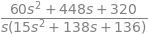

In [1]:
import lcapy

Z = lcapy.impedance('4 * (15 * (s ** 2) + 112 * s + 80) / (s * ( 15 * (s ** 2) + 138 * s + 136))')
Z.expr

In [2]:
net = Z.network()
Z.network()

(((C(121 
────
1295) + R(67081
─────
 6292)) | C(169 
────
2072)) + R(30
──
13)) | C(1/4)

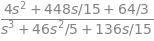

In [3]:
net_z = net.Z(lcapy.s)
net_z.canonical().expr

We implement wanted circuit with lcapy, then plot circuit impedence.

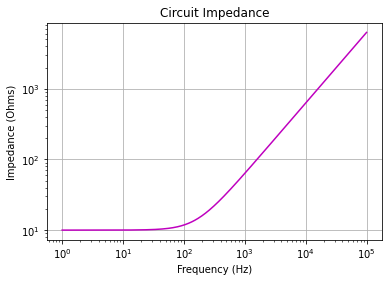

In [4]:
import numpy
from matplotlib import pyplot as plot

circuit = lcapy.R(10) + lcapy.L(0.01)

v_f = numpy.logspace(0, 5, 400)
cct = circuit.Z(lcapy.f).evaluate(v_f)

plot.loglog(v_f, abs(cct), c='m')
plot.title('Circuit Impedance')
plot.xlabel('Frequency (Hz)')
plot.ylabel('Impedance (Ohms)')
plot.grid()
plot.show()

After adding voltage source we plot current of short circuit and voltage of open circuit

Text(0.5, 1.0, 'Voltage of Open Circuit')

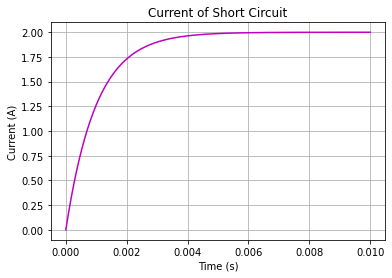

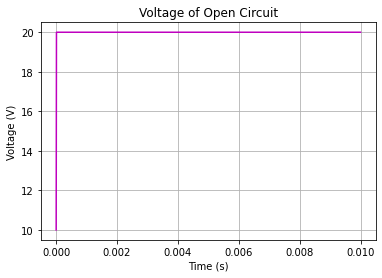

In [5]:
circuit = lcapy.Vstep(20) + lcapy.R(10) + lcapy.L(0.01)

v_t = numpy.linspace(0, 0.01, 1000)

plt = circuit.Isc(lcapy.t).plot(v_t, c = 'm')
plt.set_title('Current of Short Circuit')

plt = circuit.Voc(lcapy.t).plot(v_t, c = 'm')
plt.set_title('Voltage of Open Circuit')